<a href="https://colab.research.google.com/github/AbelJames26/Project_Mining/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
import sqlite3
import seaborn as sns

In [59]:
Path = "/content/Project_Data.csv"
df = pd.read_csv(Path)
df

,PROJECT_CODE,PROJECT_NAME,PROJECT_SHORT,PRIMARY COMMODITY,SITE_CODE,LATITUDE,LONGITUDE,SITE_LOCATION,ESTIMATING COMMODITY,EST_COM_AB,EST_COM_P,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Date,Gold_Value,RV_QTY_(Mt)
0,J05288,8 Mile Dam,8 Mile Dam,Gold,S0236141,-30.645288,121.462217,Eastern Goldfields Superterrane,Gold,Au,Yes,7.014346,1.392000,9763.969632,2.099000,558.00000,9763.969632,1/10/2022,1662.4,1.670000
1,J02707,Goodenough / Kairiki,Goodenough,Gold,S0020062,-29.676897,121.077914,Eastern Goldfields Superterrane,Gold,Au,Yes,0.715700,1.971598,1411.073000,3.365000,20642.21000,1411.073000,1/10/2022,1662.4,1.354000
2,J04664,Ora Banda / Norton,Ora Banda,Gold,S0000642,-30.372109,121.088425,Eastern Goldfields Superterrane,Gold,Au,Yes,17.790000,1.859798,33085.800000,2.276660,14718.87760,47804.677600,1/10/2022,1662.4,34.057692
3,J00292,Paddington - Mt Pleasant,Paddington - Mt Pleasant,Gold,S0000566,-30.556269,121.227040,Eastern Goldfields Superterrane,Gold,Au,Yes,59.980000,2.251367,135037.000000,1.798119,15923.12736,150960.127400,1/10/2022,1662.4,34.251312
4,J01022,Abednego West,Abednego West,Gold,S0002219,-28.833347,121.773913,Eastern Goldfields Superterrane,Gold,Au,Yes,0.070000,2.100000,147.000000,1.864000,2.88800,147.000000,2/10/2022,1662.4,2.230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,J02199,Minestat Gold Mining Centres,Minestat Mining Centres,Gold,S0006324,-30.117851,120.583111,Youanmi Terrane,Gold,Au,Yes,0.169000,2.554438,431.700000,2.648000,46174.44000,431.700000,29/10/2022,1639.6,32.368000
260,J00148,Montague Gold,Montague Gold,Gold,S0000299,-27.398185,119.538408,Youanmi Terrane,Gold,Au,Yes,10.073000,1.643145,16551.400000,2.183200,414.55000,16551.400000,29/10/2022,1639.6,37.086300
261,J02144,Quartz Creek - Minerichee,Quartz Creek - Minerichee,Gold,S0005749,-28.936187,117.049442,Youanmi Terrane,Gold,Au,Yes,0.092000,1.978043,181.980000,2.470000,3445.55000,181.980000,29/10/2022,1639.6,25.288000
262,J01718,Kundana East,EKJV,Gold,S0234165,-30.735645,121.250387,Eastern Goldfields Superterrane,Gold,Au,Yes,0.915000,4.681311,4283.400000,4.650000,31855.00000,4283.400000,31/10/2022,1635.9,4.598000


In [60]:
train_dataset = df.sample(frac = 0.7, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset.shape


(185, 20)

In [61]:
train_dataset

,PROJECT_CODE,PROJECT_NAME,PROJECT_SHORT,PRIMARY COMMODITY,SITE_CODE,LATITUDE,LONGITUDE,SITE_LOCATION,ESTIMATING COMMODITY,EST_COM_AB,EST_COM_P,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Date,Gold_Value,RV_QTY_(Mt)
136,J01011,Menzies,Menzies,Gold,S0232720,-29.700187,121.023703,Eastern Goldfields Superterrane,Gold,Au,Yes,15.4400,1.047306,16170.400,3.283000,526.6100,16170.400,14/10/2022,1641.7,29.410803
101,J04767,Eagles Nest / Maximus,Eagles Nest,Gold,S0032998,-31.436916,121.499480,Eastern Goldfields Superterrane,Gold,Au,Yes,0.6799,1.946797,1323.627,0.365500,3688.0000,1323.627,13/10/2022,1670.0,2.400000
240,J00017,Cue Gold - Central Murchison,Cue - Central Murchison,Gold,S0004577,-27.320908,117.654208,Youanmi Terrane,Gold,Au,Yes,74.3780,2.247950,167198.060,3.302650,49566.1700,216764.230,26/10/2022,1664.0,41.023650
8,J01376,Pennys Find,Pennys Find,Gold,S0237055,-30.530850,121.873865,Eastern Goldfields Superterrane,Gold,Au,Yes,0.2700,4.990926,1347.550,3.069000,6898.2525,1347.550,2/10/2022,1662.4,34.444933
181,J01349,Hannans North Tourist Mine,Hannans North Tourist Mine,Gold,S0003201,-30.727877,121.470606,Eastern Goldfields Superterrane,Gold,Au,Yes,0.0700,1.771429,124.000,2.110000,6981.0000,124.000,19/10/2022,1627.5,4.088000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,J05974,Tumblegum South,Tumblegum South,Gold,S0231014,-26.934587,118.647977,Youanmi Terrane,Gold,Au,Yes,0.6158,2.240000,1379.392,0.660000,6325.0000,1379.392,25/10/2022,1652.8,8.111500
254,J00129,Great Bingin - Bullfinch North,Great Bingin,Gold,S0005511,-30.828528,119.052409,Youanmi Terrane,Gold,Au,Yes,0.0547,7.370823,403.184,2.333000,13.7000,403.184,28/10/2022,1639.6,2.147000
11,J00250,Yandal - Bronzewing,Yandal - Bronzewing,Gold,S0024157,-27.419213,120.939015,Eastern Goldfields Superterrane,Gold,Au,Yes,25.2260,1.893499,47765.400,1.616197,25036.5000,72801.900,2/10/2022,1662.4,41.415266
119,J05862,Maguires Reward,Maguires Reward,Gold,S0239950,-27.002690,117.782915,Youanmi Terrane,Gold,Au,Yes,0.3121,2.159795,674.072,2.500000,6155.0000,674.072,13/10/2022,1670.0,2.055000


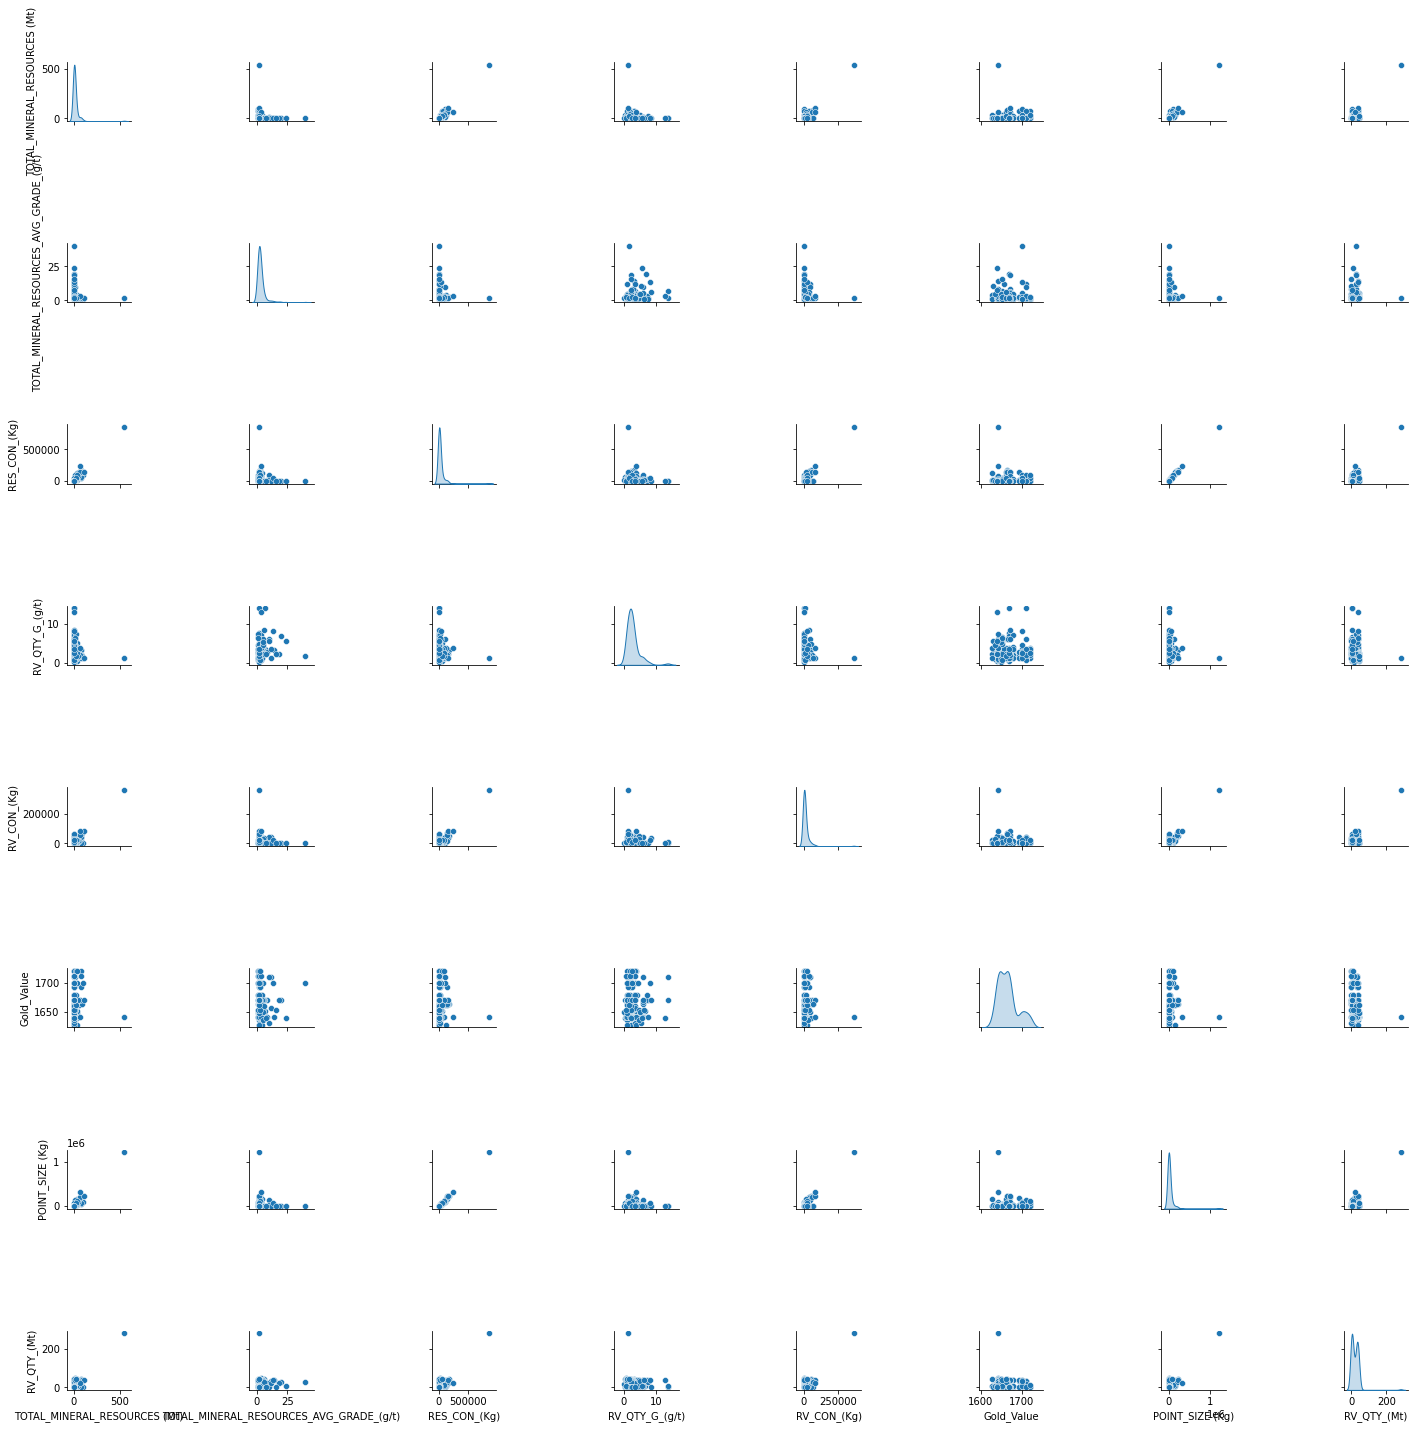

In [62]:
sns.pairplot(train_dataset[["TOTAL_MINERAL_RESOURCES (Mt)","TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)", "RES_CON_(Kg)","RV_QTY_G_(g/t)","RV_CON_(Kg)","Gold_Value", "POINT_SIZE (Kg)", "RV_QTY_(Mt)"]], diag_kind = "kde")

In [67]:
mean = train_dataset.mean(axis =0)
std = train_dataset.std (axis = 0)
train_dataset = (train_dataset- mean)/std
test_dataset = (test_dataset - mean)/std

In [70]:
def build_model (): 
  d = train_dataset.shape[1]
  model = tf.keras.models.sequential([tf.keras.layers.Dense(64,activation = 'relu',input_shape = (d,)),
           tf.keras.layers.Dense(64,activation = 'relu'),
           tf.keras.layers.Dense(1)    ])
  

  model.compile(Optimizer = 'rsmprop', loss = 'mse', metrics = ['mae'])
  return model

K - Fold Cross Validation